In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Parameters

modes = ['posteriograms','eng_mfcc_env','eng_all_classall','eng_all_classred','eng_all_syllall','eng_all_syllred','eng_all_phonall','eng_all_phonred','eng_all_sound','vae','classall','classred','syllall','syllred','phonall','phonred','sound'] # Triplet!!
#modes = ['posteriograms','eng_mfcc_env','vae','classall','classred','syllall','syllred','phonall','phonred','siamese']
#clfs = ['slp','mlp','logr','knn','rf','xgboost']#
clfs = ['knn']

list_test_participants_avp = [8,10,18,23]
list_test_participants_lvt = [0,6,7,13]

# Calculate utterance-wise weights

num_test_utterances = []
for part in list_test_participants_avp:
    if part<=9:
        test_dataset = np.load('../../data/interim/AVP/Dataset_Test_0' + str(part) + '.npy')
    else:
        test_dataset = np.load('../../data/interim/AVP/Dataset_Test_' + str(part) + '.npy')
    num_test_utterances.append(test_dataset.shape[0])
for part in list_test_participants_lvt:
    if part<=9:
        test_dataset = np.load('../../data/interim/LVT/Dataset_Test_0' + str(part) + '.npy')
    else:
        test_dataset = np.load('../../data/interim/LVT/Dataset_Test_' + str(part) + '.npy')
    num_test_utterances.append(test_dataset.shape[0])
utterance_wise_weights = num_test_utterances/np.sum(np.array(num_test_utterances))

In [3]:
# Results

for b in range(len(modes)):

    for c in range(len(clfs)):

        mode = modes[b]
        clf = clfs[c]

        accuracies_raw = np.load('../../results/' + mode + '/accuracies.npy')
        accuracies_mean = np.mean(np.mean(np.mean(accuracies_raw,axis=-1),axis=-1),axis=-1)
        accuracies_std = np.std(np.mean(np.mean(accuracies_raw,axis=-1),axis=-1),axis=-1)
        
        print([mode,clf])
        print([accuracies_mean[0],accuracies_std[0]])

['posteriograms', 'knn']
[0.4094622372025102, 0.0]
['eng_mfcc_env', 'knn']
[0.8398673133846625, 0.0]
['eng_all_classall', 'knn']
[0.8255886412728023, 0.02414853631061754]
['eng_all_classred', 'knn']
[0.8156211899845754, 0.034042360718582805]
['eng_all_syllall', 'knn']
[0.8177794537376419, 0.01835333000301938]
['eng_all_syllred', 'knn']
[0.8146887040724147, 0.03769964924783986]
['eng_all_phonall', 'knn']
[0.7966834800356868, 0.0327888463889194]
['eng_all_phonred', 'knn']
[0.831470000807254, 0.009132004810665116]
['eng_all_sound', 'knn']
[0.7853844564638699, 0.027701029570245173]
['vae', 'knn']
[0.7913643429727562, 0.016435930198353255]
['classall', 'knn']
[0.7882275008323933, 0.034696060382793374]
['classred', 'knn']
[0.7464649232598928, 0.053384080946540256]
['syllall', 'knn']
[0.8793587738279595, 0.02141427091828355]
['syllred', 'knn']
[0.871345899558189, 0.016091789268273628]
['phonall', 'knn']
[0.8624758812790535, 0.028784882820691814]
['phonred', 'knn']
[0.864469864216525, 0.026229

In [7]:
# Results

for b in range(len(modes)):

    for c in range(len(clfs)):

        mode = modes[b]
        clf = clfs[c]

        accuracies_raw = np.load('../../results/' + mode + '/accuracies.npy')
        accuracies_mean = np.mean(np.mean(np.mean(np.mean(accuracies_raw,axis=-1),axis=-1),axis=-1),axis=-1)
        accuracies_std = np.std(np.mean(np.mean(np.mean(accuracies_raw,axis=-1),axis=-1),axis=-1),axis=-1)
        
        print([mode,clf])
        print([accuracies_mean[0],accuracies_std[0]])

['posteriograms', 'knn']
[0.4094622372025102, 0.0]
['eng_mfcc_env', 'knn']
[0.8398673133846625, 0.0]
['eng_all_classall', 'knn']
[0.8199911164350769, 0.0076682665220575786]
['eng_all_classred', 'knn']
[0.8215571997769298, 0.014027484341626633]
['eng_all_syllall', 'knn']
[0.8209609287317621, 0.017035560369985426]
['eng_all_syllred', 'knn']
[0.8313331982090693, 0.010751482692254458]
['eng_all_phonall', 'knn']
[0.8289876579871498, 0.010549025923352297]
['eng_all_phonred', 'knn']
[0.8269653704793077, 0.009752046461748157]
['eng_all_sound', 'knn']
[0.790801013459913, 0.013441569457623405]
['vae', 'knn']
[0.7863679019259013, 0.021549705584060472]
['classall', 'knn']
[0.8056233976427066, 0.014434608303351899]
['classred', 'knn']
[0.7608765343063398, 0.034345083691832694]
['syllall', 'knn']
[0.8899529502200816, 0.013205589927887257]
['syllred', 'knn']
[0.8799545743299373, 0.011154119092813476]
['phonall', 'knn']
[0.874799560751869, 0.008294119264234774]
['phonred', 'knn']
[0.8841917602550587, 

In [4]:
# Results Utterance-Wise

for b in range(len(modes)):

    for c in range(len(clfs)):

        mode = modes[b]
        clf = clfs[c]

        accuracies_raw = np.load('../../results/' + mode + '/accuracies.npy')

        for i in range(accuracies_raw.shape[0]):
            for j in range(accuracies_raw.shape[1]):
                for k in range(accuracies_raw.shape[2]):
                    accuracies_raw[i,j,k] *= utterance_wise_weights*8

        accuracies_mean = np.mean(np.mean(np.mean(accuracies_raw,axis=-1),axis=-1),axis=-1)
        accuracies_std = np.std(np.mean(np.mean(accuracies_raw,axis=-1),axis=-1),axis=-1)
        
        print([mode,clf])
        print([accuracies_mean[0],accuracies_std[0]])

['posteriograms', 'knn']
[0.376996805111821, 5.551115123125783e-17]
['eng_mfcc_env', 'knn']
[0.8345047923322682, 0.0]
['eng_all_classall', 'knn']
[0.7853035143769966, 0.023973160180237898]
['eng_all_classred', 'knn']
[0.7597444089456868, 0.034345865210574436]
['eng_all_syllall', 'knn']
[0.7768690095846644, 0.021462040337616086]
['eng_all_syllred', 'knn']
[0.7844089456869009, 0.02792149488465144]
['eng_all_phonall', 'knn']
[0.7644728434504792, 0.01887137990649255]
['eng_all_phonred', 'knn']
[0.7902875399361022, 0.016111362087757757]
['eng_all_sound', 'knn']
[0.7478594249201278, 0.028828019727193607]
['vae', 'knn']
[0.7824920127795527, 0.01911429800555755]
['classall', 'knn']
[0.7674760383386581, 0.0329831937141115]
['classred', 'knn']
[0.7140575079872205, 0.05572255021859796]
['syllall', 'knn']
[0.8542492012779551, 0.028958379038243397]
['syllred', 'knn']
[0.8464536741214056, 0.016208004976813774]
['phonall', 'knn']
[0.8318210862619809, 0.037139719664476635]
['phonred', 'knn']
[0.835463

In [8]:
# Results Utterance-Wise

for b in range(len(modes)):

    for c in range(len(clfs)):

        mode = modes[b]
        clf = clfs[c]

        accuracies_raw = np.load('../../results/' + mode + '/accuracies.npy')

        for i in range(accuracies_raw.shape[0]):
            for j in range(accuracies_raw.shape[1]):
                for k in range(accuracies_raw.shape[2]):
                    for l in range(accuracies_raw.shape[3]):
                        accuracies_raw[i,j,k,l] *= utterance_wise_weights*8

        accuracies_mean = np.mean(np.mean(np.mean(np.mean(accuracies_raw,axis=-1),axis=-1),axis=-1),axis=-1)
        accuracies_std = np.std(np.mean(np.mean(np.mean(accuracies_raw,axis=-1),axis=-1),axis=-1),axis=-1)
        
        print([mode,clf])
        print([accuracies_mean[0],accuracies_std[0]])

['posteriograms', 'knn']
[0.37699680511182104, 0.0]
['eng_mfcc_env', 'knn']
[0.8345047923322682, 0.0]
['eng_all_classall', 'knn']
[0.7722428115015973, 0.005294746206612755]
['eng_all_classred', 'knn']
[0.7667731629392971, 0.01925213213274165]
['eng_all_syllall', 'knn']
[0.7823897763578275, 0.012011800653474328]
['eng_all_syllred', 'knn']
[0.7915399361022364, 0.010667490024600965]
['eng_all_phonall', 'knn']
[0.7886773162939296, 0.011994711447807527]
['eng_all_phonred', 'knn']
[0.7878594249201276, 0.008374654534450033]
['eng_all_sound', 'knn']
[0.7489584664536741, 0.0076402489378176825]
['vae', 'knn']
[0.7859936102236422, 0.026600582953835047]
['classall', 'knn']
[0.7702236421725239, 0.015317348193198889]
['classred', 'knn']
[0.7182619808306708, 0.03724195843448363]
['syllall', 'knn']
[0.8636166134185304, 0.01649253638135309]
['syllred', 'knn']
[0.8489712460063897, 0.015501002177319376]
['phonall', 'knn']
[0.8348626198083068, 0.013572679170279624]
['phonred', 'knn']
[0.851629392971246, 0

15
hhc


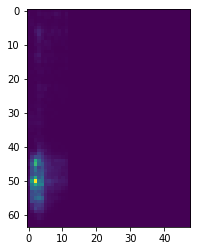

43
hho


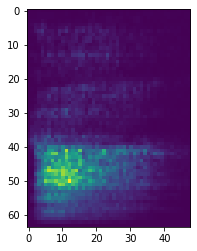

71
kd


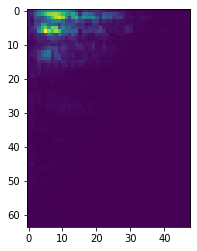

99
sd


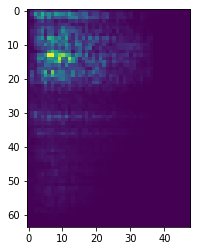

In [91]:
import matplotlib.pyplot as plt

dataset_sel = np.load('../../data/interim/AVP/Dataset_Train_03.npy')
classes_sel = np.load('../../data/interim/AVP/Classes_Train_03.npy')

const = 1
for n in range(4):
    idx = int(n*(len(classes_sel)//4)) + len(classes_sel)//8 + const
    print(idx)
    print(classes_sel[idx])
    plt.imshow(dataset_sel[idx])
    plt.show()

In [99]:
part_indices = ['03','03','03','04','05','06','07','09','09','10','10','10','11','11','14','14','15','15','16','18','20','23','23','24','24','25','25','25','26','27']
sound_indices = [101,48,80,25,23,23,85,73,102,13,38,63,13,63,16,47,66,92,99,95,73,66,92,18,88,16,46,76,37,127]
sound_labels = ['sd','hho','kd','hhc','hhc','hho','sd','kd','sd','hhc','hho','kd','hhc','kd','hhc','hho','kd','sd','sd','sd','kd','kd','sd','hhc','kd','hhc','hho','kd','hho','sd']

norm_min_max = [[0.0, 3.7073483668036347],[-9.210340371976182, 9.999500033329732e-05]]

for n in range(len(part_indices)):
    
    part_index = part_indices[n]
    sound_index = sound_indices[n]
    sound_label = sound_labels[n]

    # Spectrogram loading

    Spectrograms = np.load('../../data/interim/AVP/Dataset_Train_' + part_index + '.npy')
    Spectrogram = Spectrograms[sound_index]
    Label = sound_label

    # Spectrogram normalisation

    Spectrogram = (Spectrogram-norm_min_max[0][0])/(norm_min_max[0][1]-norm_min_max[0][0]+1e-16)
    Spectrogram = np.log(Spectrogram+1e-4)
    Spectrogram = (Spectrogram-norm_min_max[1][0])/(norm_min_max[1][1]-norm_min_max[1][0]+1e-16)

    # Vinod's thing...

